# Un jeu de dés

## Situation
Le jour de la Fête de la science, des étudiants organisent un jeu : le joueur lance 3 dés cubiques (un rouge, un vert, un bleu) bien équilibrés dont les faces sont numérotées de $1$ à $6$. S’il arrive à construire un triangle (non aplati) dont les côtés ont pour mesure les valeurs des faces obtenues, il gagne, sinon il perd.

In [6]:
import random

## 1. En débranché
Commencer par effectuer quelques simulations, avec des dés physiques ou [numériques](https://mathigon.org/polypad#random), pour identifier les cas où le joueur gagne et les cas où le joueur perd. 

**Intuitivement, semble-t-il plus probable de gagner ou de perdre à ce jeu ?**

## 2. Simulation de plusieurs parties

Le script suivant prend en entrée le résultat donnée par chacun des trois dés, et détermine si la partie est gagné ou perdue : 

In [1]:
def partie(d1,d2,d3):
    plusgrand = max(d1,d2,d3)
    deuxautres = d1 + d2 + d3 - plusgrand
    return deuxautres > plusgrand

### 2.1 Comprendre un algorithme

1. Vérifier que la partie (3,4,5) est gagnante, mais que la partie (3,6,2) est perdante. 
1. Expliquer la ligne 3. 
2. Expliquer la ligne 4. 

Le script suivant permet de simuler la réalisation d'un échantillon de `n` parties, et renvoie la fréquence des parties gagnées. 

In [7]:
def simulation(n):
    gagnes = 0
    for k in range(n):
        d1 = random.randint(1,6)
        d2 = random.randint(1,6)
        d3 = random.randint(1,6)
        gagnes += partie(d1,d2,d3)
    return gagnes / n

### 2.2 Comprendre un algorithme

1. Si on simule 10 parties, quelle est environ la fréquence des parties gagnées. Comparer avec les autres élèves de la classe. 
1. Si on simule 100 parties, quelle est environ la fréquence des parties gagnées. Comparer avec les autres élèves de la classe. 
1. Si on simule 1000 parties, quelle est environ la fréquence des parties gagnées. Comparer avec les autres élèves de la classe.
1. Expliquer la ligne 7

### 2.2 Comprendre et compléter un algorithme

Remettre en ordre les lignes suivantes, et compléter le script pour que la fonction `simulation` simule la réalisation d'un échantillon de `n` parties et renvoie la fréquence des parties gagnées. 

In [10]:
from IPython.display import IFrame
IFrame('https://www.codepuzzle.io/IP97SAN', width='100%', height=600)

## 3. Détermination de la probabilité de gagner

### 3.1 Comprendre un algorithme

Remettre en ordre la fonction suivante pour qu'elle balaye l'ensemble de tous les lancés de trois dés, et compte le nombre de lancés gagnants. 

In [19]:
# Script à effacer
def univers():
    NbreLances = 0
    NbreLancesGagants = 0
    for d1 in range(1,7):
        for d2 in range(1,7):
            for d3 in range(1,7):
                NbreLances += 1
                NbreLancesGagants += partie(d1,d2,d3)
    return NbreLances,NbreLancesGagants

In [20]:
from IPython.display import IFrame
IFrame('https://www.codepuzzle.io/IPNPJD5', width='100%', height=600)

### 3.2 Tester un programme

Déterminer à l'aide du script ci-dessus la probabilité de gagner un partie, et donner une valeur apporochée du résultat au centième près. Comparer ce résultat avec les fréquences obtenues à la partie 2. 

## 4. Fluctuation d'échantillonnage

Le script suivant affiche des listes contenant les proportions (ou fréquences) de parties gagnées  pour 10 échantillons de taille 10, puis 10 échantillons de taille 100 et enfin 10 échantillons de taille 1000.

In [22]:
print([simulation(10) for i in range(10)])
print([simulation(100) for i in range(10)])
print([simulation(1000) for i in range(10)])

[0.8, 0.5, 0.4, 0.5, 0.5, 0.8, 0.4, 0.5, 0.4, 0.3]
[0.57, 0.5, 0.44, 0.54, 0.51, 0.54, 0.51, 0.52, 0.59, 0.5]
[0.514, 0.542, 0.5, 0.533, 0.535, 0.535, 0.518, 0.501, 0.508, 0.543]


**Que remarque-t-on ?**

### 4.1 Modifier un algorithme

La fonction ci-dessous permet de réaliser $N=100$ simulations différentes d'échantillons de $n=1000$ parties. 

On a représenté par des points les fréquences obtenues : 
- en vert les fréquences qui sont dans l'intervalle $[ p-\frac{1}{\sqrt n} ; p+\frac{1}{\sqrt n} ]$, 
- en rouge celles qui ne le sont pas. 

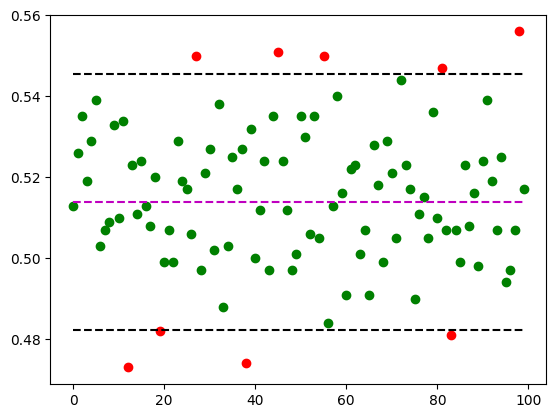

In [26]:
%matplotlib inline
from matplotlib import pyplot as plt
from math import sqrt
n, p = 1000, 111/216
N = 100
mini, maxi = p-1/sqrt(n), p+1/sqrt(n)
for repet in range(N) : 
    f = simulation(n)
    if mini < f < maxi : 
        plt.plot(repet, f, "go")
    else : 
        plt.plot(repet, f, "ro")
plt.plot([0,repet],[p, p], "m--")
plt.plot([0,repet],[mini, mini], "k--")
plt.plot([0,repet],[maxi, maxi], "k--")
plt.show()

**Écrire** une fonction qui prend en argument le nombre $n$ de parties et qui renvoie le nombre de cas où l'écart entre la fréquence de gagner au cours des $n$ parties et la probabilité $p$ est inférieur ou égal à $\frac{1}{\sqrt{n}}$. Le nombre d'échantillons est fixé, par exemple à $N=100$.